In [1]:
#import libraries

import numpy as np
import pandas as pd
from yaml import safe_load
import os
from tqdm import tqdm
import pickle
import math

In [2]:
#load pickle file

df1= pickle.load(open('Common.pkl','rb'))
df1

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,innings,outcome_winner,over,first_innings_total,balls_bowled,balls_left
0,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,0,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,7,119
1,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,2,0,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,8,118
2,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,3,4,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,9,117
3,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,4,0,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,10,116
4,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,5,2,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,11,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200640,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,2,2,0,Bangalore,2nd innings,Sunrisers Hyderabad,20,208,122,4
200641,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,3,0,CJ Jordan,Bangalore,2nd innings,Sunrisers Hyderabad,20,208,123,3
200642,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,4,1,0,Bangalore,2nd innings,Sunrisers Hyderabad,20,208,124,2
200643,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,5,1,0,Bangalore,2nd innings,Sunrisers Hyderabad,20,208,125,1


In [3]:
#delete 2nd inning data

df1 = df1[df1['innings'] == '1st innings']
df1.drop(columns=['innings'],inplace=True)
df1

C:\Users\Arth\AppData\Local\Temp\ipykernel_8332\2067141040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['innings'],inplace=True)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,outcome_winner,over,first_innings_total,balls_bowled,balls_left
0,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,0,0,Hyderabad,Sunrisers Hyderabad,1,207,7,119
1,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,2,0,0,Hyderabad,Sunrisers Hyderabad,1,207,8,118
2,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,3,4,0,Hyderabad,Sunrisers Hyderabad,1,207,9,117
3,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,4,0,0,Hyderabad,Sunrisers Hyderabad,1,207,10,116
4,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,5,2,0,Hyderabad,Sunrisers Hyderabad,1,207,11,115
...,...,...,...,...,...,...,...,...,...,...,...,...
200516,1095,Sunrisers Hyderabad,Royal Challengers Bengaluru,2,6,0,Bangalore,Sunrisers Hyderabad,20,208,122,4
200517,1095,Sunrisers Hyderabad,Royal Challengers Bengaluru,3,6,0,Bangalore,Sunrisers Hyderabad,20,208,123,3
200518,1095,Sunrisers Hyderabad,Royal Challengers Bengaluru,4,1,0,Bangalore,Sunrisers Hyderabad,20,208,124,2
200519,1095,Sunrisers Hyderabad,Royal Challengers Bengaluru,5,1,0,Bangalore,Sunrisers Hyderabad,20,208,125,1


In [4]:
#Calculate the cumulative sum of 'runs' for each 'match_id'


df1['current_score'] = df1.groupby('match_id')['runs'].cumsum()

C:\Users\Arth\AppData\Local\Temp\ipykernel_8332\2413413291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['current_score'] = df1.groupby('match_id')['runs'].cumsum()


In [5]:
#check 'first_innings_total' and 'current_score' are numeric


df1['first_innings_total'] = pd.to_numeric(df1['first_innings_total'], errors='coerce')
df1['current_score'] = pd.to_numeric(df1['current_score'], errors='coerce')

#Calculate 'runs_left' by subtracting 'current_score' from 'total_runs_x'
df1['runs_left'] = df1['first_innings_total'] - df1['current_score']

C:\Users\Arth\AppData\Local\Temp\ipykernel_8332\2986290938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['first_innings_total'] = pd.to_numeric(df1['first_innings_total'], errors='coerce')
C:\Users\Arth\AppData\Local\Temp\ipykernel_8332\2986290938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['current_score'] = pd.to_numeric(df1['current_score'], errors='coerce')
C:\Users\Arth\AppData\Local\Temp\ipykernel_8332\2986290938.py:8: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [6]:
#Fill NaN values with "0" and convert 'player_dismissed' to integer
df1['player_dismissed'] = df1['player_dismissed'].fillna("0")
df1['player_dismissed'] = df1['player_dismissed'].apply(lambda x: 1 if x != "0" else 0)
df1['player_dismissed'] = df1['player_dismissed'].astype(int)

#Calculate the cumulative sum of 'player_dismissed' for each 'match_id'
df1['wickets'] = df1.groupby('match_id')['player_dismissed'].cumsum()

#Calculate remaining wickets 
max_wickets = 10
df1['wickets_left'] = max_wickets - df1['wickets']
df1['wickets_left'] = df1['wickets_left'].clip(lower=0)

print("Intermediate Results:")
print(df1[['match_id', 'player_dismissed', 'wickets', 'wickets_left']])

Intermediate Results:
        match_id  player_dismissed  wickets  wickets_left
0              1                 0        0            10
1              1                 0        0            10
2              1                 0        0            10
3              1                 0        0            10
4              1                 0        0            10
...          ...               ...      ...           ...
200516      1095                 0        7             3
200517      1095                 0        7             3
200518      1095                 0        7             3
200519      1095                 0        7             3
200520      1095                 0        7             3

[103794 rows x 4 columns]


C:\Users\Arth\AppData\Local\Temp\ipykernel_8332\2615851775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['player_dismissed'] = df1['player_dismissed'].fillna("0")
C:\Users\Arth\AppData\Local\Temp\ipykernel_8332\2615851775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['player_dismissed'] = df1['player_dismissed'].apply(lambda x: 1 if x != "0" else 0)
C:\Users\Arth\AppData\Local\Temp\ipykernel_8332\2615851775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [7]:
df1

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,outcome_winner,over,first_innings_total,balls_bowled,balls_left,current_score,runs_left,wickets,wickets_left
0,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,0,0,Hyderabad,Sunrisers Hyderabad,1,207,7,119,0,207,0,10
1,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,2,0,0,Hyderabad,Sunrisers Hyderabad,1,207,8,118,0,207,0,10
2,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,3,4,0,Hyderabad,Sunrisers Hyderabad,1,207,9,117,4,203,0,10
3,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,4,0,0,Hyderabad,Sunrisers Hyderabad,1,207,10,116,4,203,0,10
4,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,5,2,0,Hyderabad,Sunrisers Hyderabad,1,207,11,115,6,201,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200516,1095,Sunrisers Hyderabad,Royal Challengers Bengaluru,2,6,0,Bangalore,Sunrisers Hyderabad,20,208,122,4,194,14,7,3
200517,1095,Sunrisers Hyderabad,Royal Challengers Bengaluru,3,6,0,Bangalore,Sunrisers Hyderabad,20,208,123,3,200,8,7,3
200518,1095,Sunrisers Hyderabad,Royal Challengers Bengaluru,4,1,0,Bangalore,Sunrisers Hyderabad,20,208,124,2,201,7,7,3
200519,1095,Sunrisers Hyderabad,Royal Challengers Bengaluru,5,1,0,Bangalore,Sunrisers Hyderabad,20,208,125,1,202,6,7,3


In [8]:
#Calculate Overs Faced
df1['overs_faced'] = (df1['over'] - 1 ) + (df1['ball'] / 6)


#Calculate Current Run Rate (CRR)
df1['crr'] = df1['current_score'] / df1['overs_faced']
df1


C:\Users\Arth\AppData\Local\Temp\ipykernel_8332\2507767987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['overs_faced'] = (df1['over'] - 1 ) + (df1['ball'] / 6)
C:\Users\Arth\AppData\Local\Temp\ipykernel_8332\2507767987.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['crr'] = df1['current_score'] / df1['overs_faced']


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,outcome_winner,over,first_innings_total,balls_bowled,balls_left,current_score,runs_left,wickets,wickets_left,overs_faced,crr
0,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,0,0,Hyderabad,Sunrisers Hyderabad,1,207,7,119,0,207,0,10,0.166667,0.000000
1,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,2,0,0,Hyderabad,Sunrisers Hyderabad,1,207,8,118,0,207,0,10,0.333333,0.000000
2,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,3,4,0,Hyderabad,Sunrisers Hyderabad,1,207,9,117,4,203,0,10,0.500000,8.000000
3,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,4,0,0,Hyderabad,Sunrisers Hyderabad,1,207,10,116,4,203,0,10,0.666667,6.000000
4,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,5,2,0,Hyderabad,Sunrisers Hyderabad,1,207,11,115,6,201,0,10,0.833333,7.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200516,1095,Sunrisers Hyderabad,Royal Challengers Bengaluru,2,6,0,Bangalore,Sunrisers Hyderabad,20,208,122,4,194,14,7,3,19.333333,10.034483
200517,1095,Sunrisers Hyderabad,Royal Challengers Bengaluru,3,6,0,Bangalore,Sunrisers Hyderabad,20,208,123,3,200,8,7,3,19.500000,10.256410
200518,1095,Sunrisers Hyderabad,Royal Challengers Bengaluru,4,1,0,Bangalore,Sunrisers Hyderabad,20,208,124,2,201,7,7,3,19.666667,10.220339
200519,1095,Sunrisers Hyderabad,Royal Challengers Bengaluru,5,1,0,Bangalore,Sunrisers Hyderabad,20,208,125,1,202,6,7,3,19.833333,10.184874


In [9]:
#Group by 'match_id'

groups = df1.groupby('match_id')

match_ids = df1['match_id'].unique()

#Calculate rolling sum of last 30 runs for each match and store in 'last_five'
last_five = []
for id in match_ids:
    group = groups.get_group(id)
    rolling_sum = group['runs'].rolling(window=30).sum().fillna(0)  # Handle NaN values with fillna
    last_five.extend(rolling_sum.values.tolist())

In [10]:
#Add 'last_five' to the DataFrame
df1['last_five'] = last_five

C:\Users\Arth\AppData\Local\Temp\ipykernel_8332\1413239956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['last_five'] = last_five


In [11]:
#final DataFrame 

final_df=df1[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','first_innings_total']]

In [12]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,first_innings_total
0,Sunrisers Hyderabad,Royal Challengers Bengaluru,Hyderabad,0,119,10,0.000000,0.0,207
1,Sunrisers Hyderabad,Royal Challengers Bengaluru,Hyderabad,0,118,10,0.000000,0.0,207
2,Sunrisers Hyderabad,Royal Challengers Bengaluru,Hyderabad,4,117,10,8.000000,0.0,207
3,Sunrisers Hyderabad,Royal Challengers Bengaluru,Hyderabad,4,116,10,6.000000,0.0,207
4,Sunrisers Hyderabad,Royal Challengers Bengaluru,Hyderabad,6,115,10,7.200000,0.0,207
...,...,...,...,...,...,...,...,...,...
200516,Sunrisers Hyderabad,Royal Challengers Bengaluru,Bangalore,194,4,3,10.034483,54.0,208
200517,Sunrisers Hyderabad,Royal Challengers Bengaluru,Bangalore,200,3,3,10.256410,56.0,208
200518,Sunrisers Hyderabad,Royal Challengers Bengaluru,Bangalore,201,2,3,10.220339,56.0,208
200519,Sunrisers Hyderabad,Royal Challengers Bengaluru,Bangalore,202,1,3,10.184874,57.0,208


In [13]:
#check nall values 

final_df.isnull().sum()

batting_team           0
bowling_team           0
city                   0
current_score          0
balls_left             0
wickets_left           0
crr                    0
last_five              0
first_innings_total    0
dtype: int64

In [14]:
#shuffle data

final_df = final_df.sample(final_df.shape[0])
final_df

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,first_innings_total
86613,Royal Challengers Bengaluru,Chennai Super Kings,Chennai,15,109,10,8.181818,0.0,173
45076,Chennai Super Kings,Rajasthan Royals,Abu Dhabi,88,46,8,7.135135,38.0,189
21655,Mumbai Indians,Punjab Kings,Chandigarh,26,104,10,9.750000,0.0,176
155288,Delhi Capitals,Chennai Super Kings,Chennai,75,33,5,5.172414,25.0,114
181876,Chennai Super Kings,Delhi Capitals,Chennai,38,95,8,9.120000,0.0,150
...,...,...,...,...,...,...,...,...,...
156659,Chennai Super Kings,Punjab Kings,Dharamsala,17,103,10,6.000000,0.0,120
32774,Delhi Capitals,Chennai Super Kings,Visakhapatnam,57,68,8,6.576923,27.0,147
93724,Sunrisers Hyderabad,Delhi Capitals,Delhi,197,33,6,13.586207,40.0,266
43196,Sunrisers Hyderabad,Chennai Super Kings,Delhi,100,37,9,7.228916,41.0,171


In [15]:
#remove target variable 

X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [16]:
#split data into train and test data

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
25268,Rajasthan Royals,Chennai Super Kings,Jaipur,5,116,10,7.500000,0.0
174753,Delhi Capitals,Chennai Super Kings,Delhi,46,84,8,7.666667,38.0
152798,Royal Challengers Bengaluru,Punjab Kings,Bangalore,33,84,9,5.500000,32.0
94002,Kolkata Knight Riders,Royal Challengers Bengaluru,Kolkata,210,5,4,10.956522,60.0
119141,Kolkata Knight Riders,Royal Challengers Bengaluru,Centurion,97,35,7,6.847059,39.0
...,...,...,...,...,...,...,...,...
55858,Chennai Super Kings,Sunrisers Hyderabad,Mumbai,36,89,8,6.967742,36.0
54916,Rajasthan Royals,Royal Challengers Bengaluru,Mumbai,54,74,9,7.043478,38.0
77998,Rajasthan Royals,Chennai Super Kings,Jaipur,134,34,7,9.348837,37.0
118723,Royal Challengers Bengaluru,Rajasthan Royals,Centurion,91,19,3,5.405941,31.0


In [18]:
#convert non-numerical columns with help of OneHotEncoding

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], 
    remainder='passthrough')

## XGBoost 

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression


In [20]:
#Create a pipeline with StandardScaler and XGBoost

pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [21]:
#train model

pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=12, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

In [22]:
#make prediction 

y_pred = pipe.predict(X_test)

In [23]:
#Calculate MSE, RMSE, R-squared, and MAE

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

#Print the evaluation metrics

print("R-squared (Accuracy):", r_squared)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


R-squared (Accuracy): 0.886759467167194
Mean Squared Error (MSE): 115.50605876494303
Root Mean Squared Error (RMSE): 10.747374505661512
Mean Absolute Error (MAE): 4.905656223140003


In [24]:
#make prediction

pipe.predict(X_train)[1]

205.22466

In [25]:
# pickle.dump(pipe,open('pipe.pkl','wb'))

In [26]:
# Define the parameter grid for XGBoost

param_grid_xgb = {
    'step3__n_estimators': [100, 500, 1000],
    'step3__learning_rate': [0.01, 0.1, 0.2],
    'step3__max_depth': [3, 6, 12]
}

#Grid search with cross-validation
grid_search_xgb = GridSearchCV(pipe, param_grid_xgb, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search_xgb.fit(X, y)

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Cross-Validation R^2 Score for XGBoost:", grid_search_xgb.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for XGBoost: {'step3__learning_rate': 0.1, 'step3__max_depth': 12, 'step3__n_estimators': 500}
Best Cross-Validation R^2 Score for XGBoost: 0.8993098194474192


In [27]:
# #train model with cross-validation

# best_xgb_pipe = grid_search_xgb.best_estimator_
# best_xgb_pipe.fit(X, y)

In [28]:
# #make predictions

# y_pred_new = best_xgb_pipe.predict(X_train)[1]

# print("Predictions:", y_pred_new)

In [29]:
from sklearn.model_selection import cross_val_predict

best_xgb_pipe = grid_search_xgb.best_estimator_

# Calculate MSE, RMSE, R-squared, and MAE for cross-validated predictions
y_pred_cv = cross_val_predict(best_xgb_pipe, X, y, cv=5)

mse_cv = mean_squared_error(y, y_pred_cv)
rmse_cv = sqrt(mse_cv)
r_squared_cv = r2_score(y, y_pred_cv)
mae_cv = mean_absolute_error(y, y_pred_cv)

# Print the evaluation metrics for cross-validated predictions
print("\nCross-Validated Metrics:")
print("Mean Squared Error (MSE):", mse_cv)
print("Root Mean Squared Error (RMSE):", rmse_cv)
print("R-squared (Accuracy):", r_squared_cv)
print("Mean Absolute Error (MAE):", mae_cv)



Cross-Validated Metrics:
Mean Squared Error (MSE): 102.35085823344981
Root Mean Squared Error (RMSE): 10.116860097552491
R-squared (Accuracy): 0.8993207987653026
Mean Absolute Error (MAE): 4.807310425734674


## Random Forest 

In [31]:
#Create a pipeline with StandardScaler and Random Forest

pipe_rf = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [32]:
#train model

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3', RandomForestRegressor(random_state=42))])

In [33]:
#make prediction 

y_pred_rf = pipe_rf.predict(X_test)

In [34]:
#Calculate MSE, RMSE, R-squared, and MAE

r_squared = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)

#Print the evaluation metrics

print("R-squared (Accuracy):", r_squared)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


R-squared (Accuracy): 0.879150049331025
Mean Squared Error (MSE): 123.26771302216244
Root Mean Squared Error (RMSE): 11.102599381323387
Mean Absolute Error (MAE): 5.59942047690228


In [35]:
# Define the parameter grid for random forest

param_grid_rf = {
    'step3__n_estimators': [500],
    'step3__max_depth': [None],
    'step3__min_samples_split': [2]
}

#Grid search with cross-validation
grid_search_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search_rf.fit(X, y)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation R^2 Score for Random Forest:", grid_search_rf.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for Random Forest: {'step3__max_depth': None, 'step3__min_samples_split': 2, 'step3__n_estimators': 500}
Best Cross-Validation R^2 Score for Random Forest: 0.8828607050969453


In [49]:
#Calculate MSE, RMSE, R-squared, and MAE 
y_pred_cv_rf = cross_val_predict(grid_search_rf.best_estimator_, X, y, cv=5)

mse_cv_rf = mean_squared_error(y, y_pred_cv_rf)
rmse_cv_rf = sqrt(mse_cv_rf)
r_squared_cv_rf = r2_score(y, y_pred_cv_rf)
mae_cv_rf = mean_absolute_error(y, y_pred_cv_rf)

#Print the evaluation metrics 
print("\nCross-Validated Metrics for Random Forest:")
print("Mean Squared Error (MSE):", mse_cv_rf)
print("Root Mean Squared Error (RMSE):", rmse_cv_rf)
print("R-squared (Accuracy):", r_squared_cv_rf)
print("Mean Absolute Error (MAE):", mae_cv_rf)


Cross-Validated Metrics for Random Forest:
Mean Squared Error (MSE): 119.07835669732842
Root Mean Squared Error (RMSE): 10.912302996953871
R-squared (Accuracy): 0.8828665040669945
Mean Absolute Error (MAE): 5.492476731674292


## LightGBM

In [36]:
#Create a pipeline with StandardScaler and lightgbm

pipe_lgbm = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.2, max_depth=12, random_state=42, verbose=-1))
])

In [37]:
#train model

pipe_lgbm.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 LGBMRegressor(learning_rate=0.2, max_depth=12,
                               n_estimators=1000, random_state=42,
                               verbose=-1))])

In [38]:
#make prediction

y_pred_lgbm = pipe_lgbm.predict(X_test)

In [39]:
#Calculate MSE, RMSE, R-squared, and MAE

r_squared = r2_score(y_test, y_pred_lgbm)
mse = mean_squared_error(y_test, y_pred_lgbm)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lgbm)

#Print the evaluation metrics

print("R-squared (Accuracy):", r_squared)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R-squared (Accuracy): 0.8768201413288698
Mean Squared Error (MSE): 125.64423390105301
Root Mean Squared Error (RMSE): 11.209113876710015
Mean Absolute Error (MAE): 6.847505539471923


In [40]:
#Define the parameter grid for lightbgm

param_grid_lgbm = {
    'step3__n_estimators': [100, 500, 1000],
    'step3__learning_rate': [0.01, 0.1, 0.2],
    'step3__max_depth': [3, 6, 12]
}

#Grid search with cross-validation
grid_search_lgbm = GridSearchCV(pipe_lgbm, param_grid_lgbm, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search_lgbm.fit(X, y)

print("Best Parameters for LightGBM:", grid_search_lgbm.best_params_)
print("Best Cross-Validation R^2 Score for LightGBM:", grid_search_lgbm.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for LightGBM: {'step3__learning_rate': 0.2, 'step3__max_depth': 12, 'step3__n_estimators': 1000}
Best Cross-Validation R^2 Score for LightGBM: 0.8808146637344292


In [50]:
#Calculate MSE, RMSE, R-squared, and MAE 
y_pred_cv_lgbm = cross_val_predict(grid_search_lgbm.best_estimator_, X, y, cv=5)

mse_cv_lgbm = mean_squared_error(y, y_pred_cv_lgbm)
rmse_cv_lgbm = sqrt(mse_cv_lgbm)
r_squared_cv_lgbm = r2_score(y, y_pred_cv_lgbm)
mae_cv_lgbm = mean_absolute_error(y, y_pred_cv_lgbm)

# Print the evaluation metrics 
print("\nCross-Validated Metrics for LightGBM:")
print("Mean Squared Error (MSE):", mse_cv_lgbm)
print("Root Mean Squared Error (RMSE):", rmse_cv_lgbm)
print("R-squared (Accuracy):", r_squared_cv_lgbm)
print("Mean Absolute Error (MAE):", mae_cv_lgbm)


Cross-Validated Metrics for LightGBM:
Mean Squared Error (MSE): 121.13600481224165
Root Mean Squared Error (RMSE): 11.006180300732932
R-squared (Accuracy): 0.8808424627232567
Mean Absolute Error (MAE): 6.720888557432838


## Linear Regression

In [41]:
#Create a pipeline with StandardScaler and LinearRegression

lr_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', LinearRegression())
])

In [42]:
#Train Model

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()), ('step3', LinearRegression())])

In [43]:
#make prediction 

y_pred_lr = lr_pipe.predict(X_test)

In [44]:
#Calculate MSE, RMSE, R-squared, and MAE

r_squared = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lr)

#Print the evaluation metrics

print("R-squared (Accuracy):", r_squared)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R-squared (Accuracy): 0.5479084429314183
Mean Squared Error (MSE): 461.13624381295904
Root Mean Squared Error (RMSE): 21.474083072693908
Mean Absolute Error (MAE): 15.88878112209224


In [45]:
# Define the parameter grid for Linear Regression

param_grid_linear = {
    'step3__fit_intercept': [True, False],
    'step3__copy_X': [True, False],
    'step3__n_jobs': [1, -1],
}

#Grid search with cross-validation
grid_search_linear = GridSearchCV(lr_pipe, param_grid_linear, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search_linear.fit(X, y)

print("Best Parameters for Linear Regression:", grid_search_linear.best_params_)
print("Best Cross-Validation R^2 Score for Linear Regression:", grid_search_linear.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for Linear Regression: {'step3__copy_X': True, 'step3__fit_intercept': True, 'step3__n_jobs': 1}
Best Cross-Validation R^2 Score for Linear Regression: 0.5512989916340281


In [51]:
#Calculate MSE, RMSE, R-squared, and MAE 
y_pred_cv_linear = cross_val_predict(grid_search_linear.best_estimator_, X, y, cv=5)

mse_cv_linear = mean_squared_error(y, y_pred_cv_linear)
rmse_cv_linear = sqrt(mse_cv_linear)
r_squared_cv_linear = r2_score(y, y_pred_cv_linear)
mae_cv_linear = mean_absolute_error(y, y_pred_cv_linear)

#Print the evaluation metrics 
print("\nCross-Validated Metrics for Linear Regression:")
print("Mean Squared Error (MSE):", mse_cv_linear)
print("Root Mean Squared Error (RMSE):", rmse_cv_linear)
print("R-squared (Accuracy):", r_squared_cv_linear)
print("Mean Absolute Error (MAE):", mae_cv_linear)


Cross-Validated Metrics for Linear Regression:
Mean Squared Error (MSE): 456.1127457244924
Root Mean Squared Error (RMSE): 21.356796242051203
R-squared (Accuracy): 0.5513367674185377
Mean Absolute Error (MAE): 15.841588270531032


In [32]:
# #download pickle file

# pickle.dump(best_xgb_pipe,open('Hyperperameter_pipe.pkl','wb'))

In [39]:
#feature Importance 

importances = pipe.named_steps['step3'].feature_importances_

categories_feature = pipe.named_steps['step1'].named_transformers_['trf'].get_feature_names_out(['batting_team', 'bowling_team', 'city'])
numerical_features = ['current_score', 'balls_left', 'wickets_left', 'crr', 'last_five']

#Combine feature names
all_feature_names = list(categories_feature) + numerical_features
feature_importance = dict(zip(all_feature_names, importances))
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

In [36]:
#calculate average category values 

importance_df = pd.DataFrame(sorted_importance, columns=['Feature', 'Importance'])
city_features = [name for name in all_feature_names if name.startswith('city_')]
batting_team_features = [name for name in all_feature_names if name.startswith('batting_team_')]
bowling_team_features = [name for name in all_feature_names if name.startswith('bowling_team_')]
numerical_features = [name for name in all_feature_names if name not in city_features + batting_team_features + bowling_team_features]

def average_importance(features):
    return importance_df[importance_df['Feature'].isin(features)]['Importance'].mean()

avg_importances = {
    'City Features': average_importance(city_features),
    'Batting Team Features': average_importance(batting_team_features),
    'Bowling Team Features': average_importance(bowling_team_features)
}
numerical_importances = importance_df[importance_df['Feature'].isin(numerical_features)]

combined_importances = {**avg_importances, **dict(zip(numerical_importances['Feature'], numerical_importances['Importance']))}
combined_df = pd.DataFrame(list(combined_importances.items()), columns=['Feature', 'Importance'])

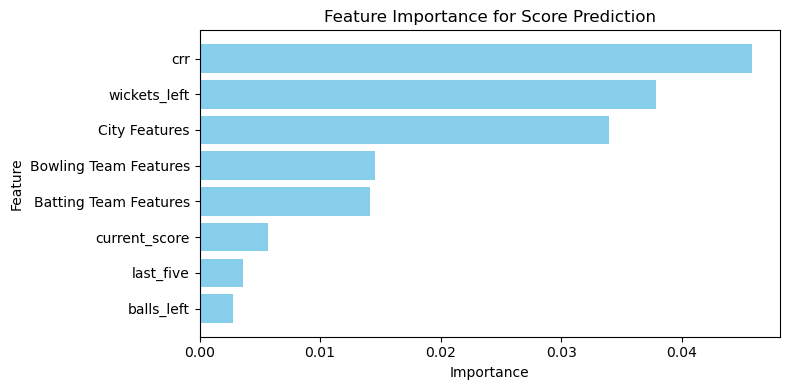

In [42]:
#visualise Feature Importance

combined_df = combined_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(combined_df['Feature'], combined_df['Importance'], color='skyblue')
plt.title('Feature Importance for Score Prediction' )
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()